# Data Science Movie Analysis Visualization  :
**The purpose of this project is to analyze the movies data check which movie is most likely and get more votes .**

Here's an outline of the project:

- Import the dataset
- Understand the dataset
- Clean the dataset 
- Visualize the dataset
- Recommendation
- Report Writing 

## 1. Import the Dataset

Steps:

- Install required libraries
- Import the libraries
- Import the dataset 


### Install Required Libraries

In [2]:
!pip install pandas numpy --quiet

In [3]:
import pandas as pd
import sqlite3
pd.options.display.float_format = '{:.2f}'.format 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Importing the Dataset 

In [4]:
# We have original_language	original_title	popularity	release_date	title	vote_average	vote_count and year of the movie.
movie_info = pd.read_csv('tmdb.movies.csv.gz',parse_dates=['release_date'])
genre_info = pd.read_csv('abc.csv')
bom_info=pd.read_csv('bom.movie_gross.csv.gz')


## Understand the dataset

In [5]:
#Print the dataset representing number of columns
movie_info.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610


In [6]:
# No of columns in the dataset 
print(movie_info.columns)

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [7]:
movie_info=movie_info[['genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count']]

In [8]:
### Checking No of rows and columns in the dataset .
movie_info.shape 

(26517, 9)

In [9]:
#drop null values in the dataset
movie_info.dropna(inplace=True)

In [10]:
#There is no null values present in the dataset.
movie_info.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

## Clean the dataset

In [11]:
# Drop Duplicates values 
movie_info.drop_duplicates(keep='first', inplace=True)

In [12]:
# Check os theres any duplicate values in the dataset.
movie=movie_info.duplicated().any()
print("Are there any duplicated values in movies  data :", movie)

Are there any duplicated values in movies  data : False


In [13]:
# There is no outlier Present in the dataset .
movie_info.describe()

,id,popularity,vote_average,vote_count
count,25497.00,25497.00,25497.00,25497.00
mean,294203.96,3.04,5.98,178.80
std,154690.25,4.26,1.87,914.15
min,27.00,0.60,0.00,1.00
25%,154770.00,0.60,5.00,1.00
50%,307125.00,1.32,6.00,5.00
75%,420707.00,3.49,7.00,25.00
max,608444.00,80.77,10.00,22186.00


In [14]:
genre_info.head(2)

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"


In [15]:
#drop null values 
genre_info.dropna(inplace=True)

In [16]:
#There is no null values present in the dataset.
genre_info.isnull().sum()

Unnamed: 0         0
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [17]:
# Drop Duplicates values 
genre_info.drop_duplicates(keep='first', inplace=True)

In [18]:
# Check os theres any duplicate values in the dataset.
genre=genre_info.duplicated().any()
print("Are there any duplicated values in Genre data :", movie)

Are there any duplicated values in Genre data : False


In [19]:
genre_info.describe()

,Unnamed: 0,start_year,runtime_minutes
count,112232.00,112232.00,112232.00
mean,70083.92,2014.40,86.26
std,41038.11,2.64,167.90
min,0.00,2010.00,1.00
25%,34545.75,2012.00,70.00
50%,68336.50,2014.00,87.00
75%,104076.25,2017.00,99.00
max,146139.00,2022.00,51420.00


In [20]:
# Bom contain title , Studio , Domestic Gross , Foriegn gross , year 
print(bom_info.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [21]:
# Printing the number of columns 
bom_info.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010


In [22]:
#drop null values 
bom_info.dropna(inplace=True)

In [23]:
#There is no null values present in the dataset.
bom_info.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [24]:
# Drop Duplicates values
bom_info.drop_duplicates(keep='first', inplace=True)

In [25]:
# Check os theres any duplicate values in the dataset.
bom=bom_info.duplicated().any()
print("Are there any duplicated values in Bom data :", bom)

Are there any duplicated values in Bom data : False


- **Combining Gross Domestic and Gross Foriegn =Total Earned**

In [34]:
bom_info['foreign_gross']= [float(str(i).replace(",", "")) for i in bom_info['foreign_gross']]

bom_info['foreign_gross'] = bom_info['foreign_gross'].astype(float)


In [33]:
bom_info['Total_Earned']=bom_info['domestic_gross']+bom_info['foreign_gross']

- **Concat the dataset based on title** 

In [35]:
Concat_dataset=movie_info.merge(genre_info, left_on='original_title', right_on='primary_title')

In [29]:
Concat_dataset=Concat_dataset[['id', 'original_language',
       'popularity', 'release_date', 'vote_average', 'vote_count'
       , 'movie_id', 'primary_title',
       'start_year', 'runtime_minutes', 'genres']]

In [30]:
 Concat_dataset.head(2)

,id,original_language,popularity,release_date,vote_average,vote_count,movie_id,primary_title,start_year,runtime_minutes,genres
0,12444,en,33.53,2010-11-19,7.70,10788,tt0926084,Harry Potter and the Deathly Hallows: Part 1,2010,146.00,"Adventure,Fantasy,Mystery"
1,10191,en,28.73,2010-03-26,7.70,7610,tt0892769,How to Train Your Dragon,2010,98.00,"Action,Adventure,Animation"


In [36]:
Concat_dataset=Concat_dataset.merge(bom_info, left_on='primary_title', right_on='title')

In [37]:
Concat_dataset.head(2)

,genre_ids,id,original_language,original_title_x,popularity,release_date,title_x,vote_average,vote_count,Unnamed: 0,...,original_title_y,start_year,runtime_minutes,genres,title_y,studio,domestic_gross,foreign_gross,year,Total_Earned
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610,423,...,How to Train Your Dragon,2010,98.00,"Action,Adventure,Animation",How to Train Your Dragon,P/DW,217600000.00,277300000.00,2010,494900000.00
1,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368,5998,...,Iron Man 2,2010,124.00,"Action,Adventure,Sci-Fi",Iron Man 2,Par.,312400000.00,311500000.00,2010,623900000.00


In [38]:
Concat_dataset.columns

Index(['genre_ids', 'id', 'original_language', 'original_title_x',
       'popularity', 'release_date', 'title_x', 'vote_average', 'vote_count',
       'Unnamed: 0', 'movie_id', 'primary_title', 'original_title_y',
       'start_year', 'runtime_minutes', 'genres', 'title_y', 'studio',
       'domestic_gross', 'foreign_gross', 'year', 'Total_Earned'],
      dtype='object')

In [39]:
Average_of_Total_Earned = Concat_dataset['Total_Earned'].mean()
more_then_average=Concat_dataset.loc[Concat_dataset['Total_Earned']>Average_of_Total_Earned]

In [40]:
more_then_average[['genres']].head(2)

,genres
0,"Action,Adventure,Animation"
1,"Action,Adventure,Sci-Fi"


In [41]:
Concat_dataset.sort_values('Total_Earned',ascending=False).head(3)


,genre_ids,id,original_language,original_title_x,popularity,release_date,title_x,vote_average,vote_count,Unnamed: 0,...,original_title_y,start_year,runtime_minutes,genres,title_y,studio,domestic_gross,foreign_gross,year,Total_Earned
1197,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.38,2015-05-01,Avengers: Age of Ultron,7.30,13457,39010,...,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1405400000.00
525,"[28, 16]",86841,en,Black Panther,2.06,2011-01-18,Black Panther,5.10,11,19050,...,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00
526,"[28, 12, 14, 878]",284054,en,Black Panther,44.14,2018-02-16,Black Panther,7.40,12365,19050,...,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00


In [32]:
Concat_dataset.sort_values('runtime_minutes',ascending=False).head(3)

,id,original_language,popularity,release_date,vote_average,vote_count,movie_id,primary_title,start_year,runtime_minutes,genres
6693,223004,en,2.62,2007-01-01,3.10,4,tt7467634,Aberration,2016,1834.00,Drama
12361,509253,en,0.60,2015-03-03,10.00,1,tt2261469,Double Fine Adventure,2015,724.00,Documentary
4384,183412,en,3.58,2012-10-11,4.10,31,tt8296608,Dead Souls,2018,495.00,Documentary


## Data Visualization

#### Find genre 

In [54]:
Top_Popular_Genre_Movies = Concat_dataset.groupby(['genres'])['Total_Earned'].mean().sort_values(ascending=False).reset_index()

In [55]:
Top_Popular_Genre_Movies_5=Top_Popular_Genre_Movies.head(5)

<ipython-input-56-7ce3fbafd752>:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


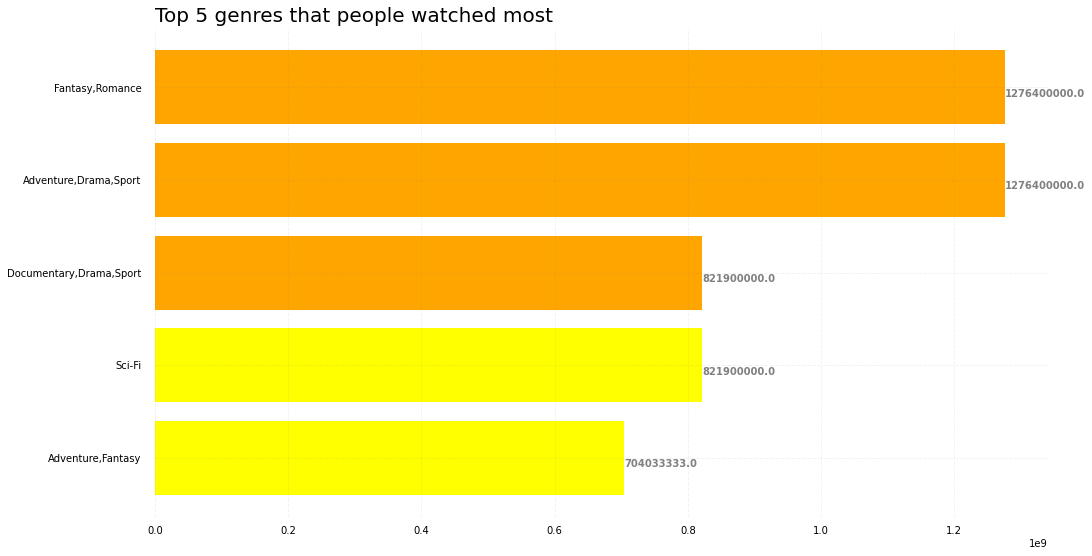

In [56]:
 
name = Top_Popular_Genre_Movies_5['genres']
price = Top_Popular_Genre_Movies_5['Total_Earned']
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
c = ['orange','orange','orange','yellow','yellow']

# Horizontal Bar Plot
ax.barh(name,price, color = c)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Top 5 genres that people watched most',
             loc ='left',fontsize=20 )
 

# Show Plot
plt.show()

In [71]:
Top_Popular_Genre_Movies_5.head(5)

,genres,Total_Earned
0,"Fantasy,Romance",1276400000.00
1,"Adventure,Drama,Sport",1276400000.00
2,"Documentary,Drama,Sport",821900000.00
3,Sci-Fi,821900000.00
4,"Adventure,Fantasy",704033333.00


In [87]:
Top_Popular_Studio_Movies = Concat_dataset.groupby(['studio'])['Total_Earned'].mean().sort_values(ascending=False).reset_index()


In [88]:
Top_Popular_Studio_Movies_5=Top_Popular_Studio_Movies.head(5)

In [102]:
Top_Popular_Studio_Movies_5.head()

,studio,Total_Earned
0,BV,523832171.97
1,P/DW,507650000.00
2,GrtIndia,254200000.00
3,WB,233757415.98
4,Sony,232238271.57


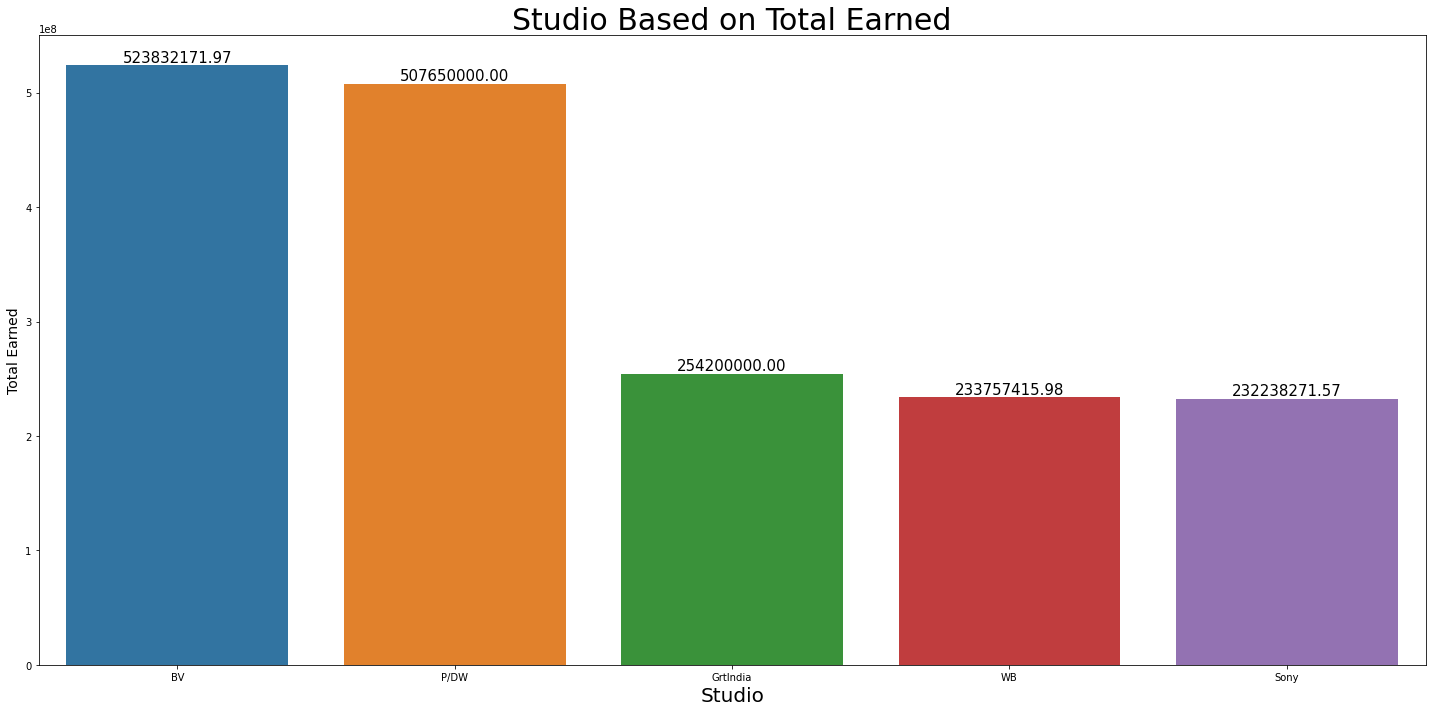

In [122]:
name = Top_Popular_Studio_Movies_5['studio']
price = Top_Popular_Studio_Movies_5['Total_Earned']
 
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the plot size
plt.figure(figsize=(20, 10))

# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="studio", y="Total_Earned", data=Top_Popular_Studio_Movies_5)

# Iterating over the bars one-by-one
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Studio", size=20)

# Setting the label for y-axis
plt.ylabel("Total Earned", size=14)

# Setting the title for the graph
plt.title("Studio Based on Total Earned",size=30)

# Finally showing the plot
plt.show()

 

- **Have to Check why the values on x axis are not truely represented.**

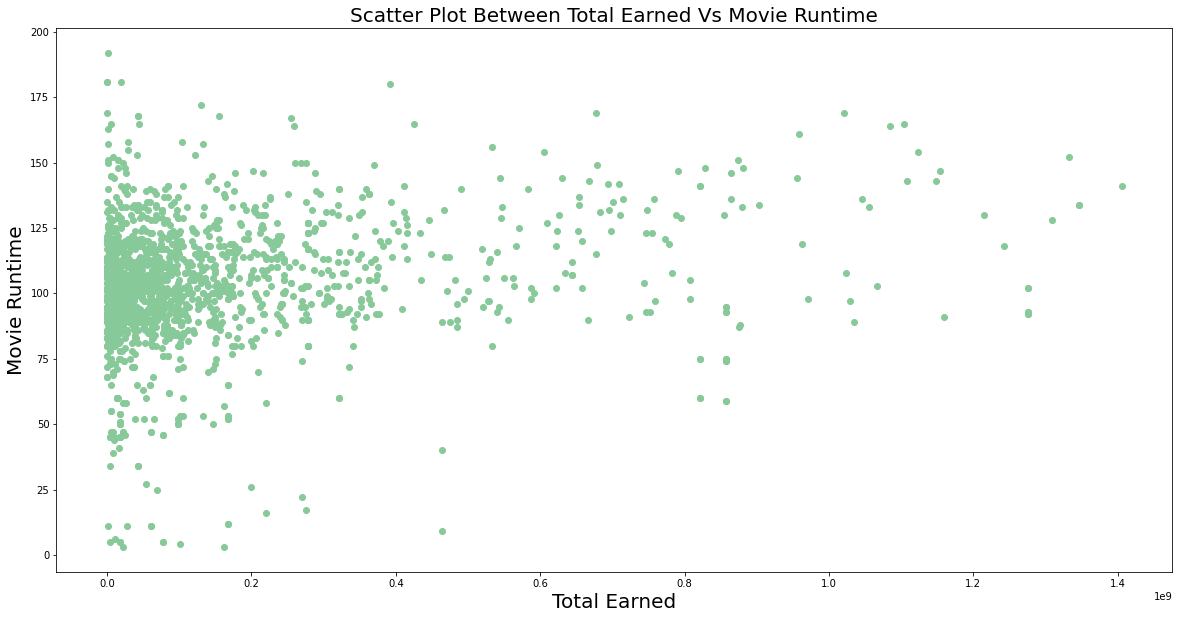

In [43]:
x = Concat_dataset['Total_Earned']
y = Concat_dataset['runtime_minutes']

plt.figure(figsize=(20,10))

plt.scatter(x, y, color = '#88c999')
plt.title("Scatter Plot Between Total Earned Vs Movie Runtime",size=20)
plt.xlabel("Total Earned",size=20)
plt.ylabel("Movie Runtime",size=20)
plt.show()


In [139]:
min(x),max(x)

(10800.0, 1405400000.0)

In [ ]:
Top_Popular_Movies = Concat_dataset.groupby(['primary_title'])['popularity'].sum().sort_values(ascending=False).reset_index()


In [ ]:
Top_10_Popular_Movies=Top_Popular_Movies.head(10)

In [ ]:
Top_10_Popular_Movies.head(10)

,primary_title,popularity
0,Home,355.23
1,Robin Hood,221.68
2,Delirium,196.27
3,Beauty and the Beast,175.48
4,Truth or Dare,169.50
5,Split,155.86
6,Inside Out,147.78
7,Cinderella,145.28
8,Lucky,143.52
9,Aftermath,133.21


<ipython-input-144-913234cefc28>:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


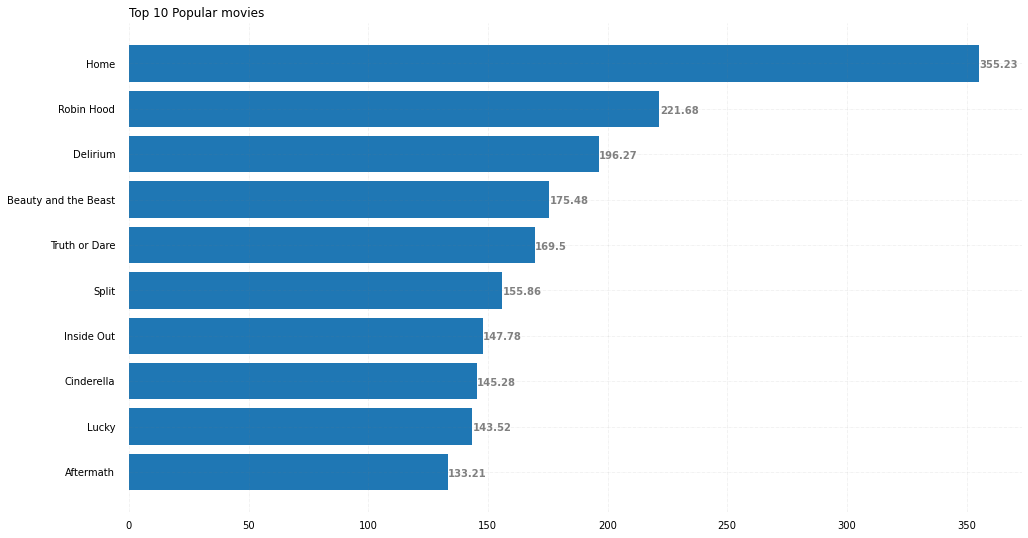

In [ ]:
 
name = Top_10_Popular_Movies['primary_title']
price = Top_10_Popular_Movies['popularity']
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Top 10 Popular movies',
             loc ='left', )
 

# Show Plot
plt.show()


In [ ]:
Most_Voted_Movies = Concat_dataset.groupby(['primary_title'])['vote_count'].sum().sort_values(ascending=False).reset_index()


In [ ]:
Top_10_Most_Voted_Movies=Most_Voted_Movies.head(10)

<ipython-input-142-d819fb179b7d>:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


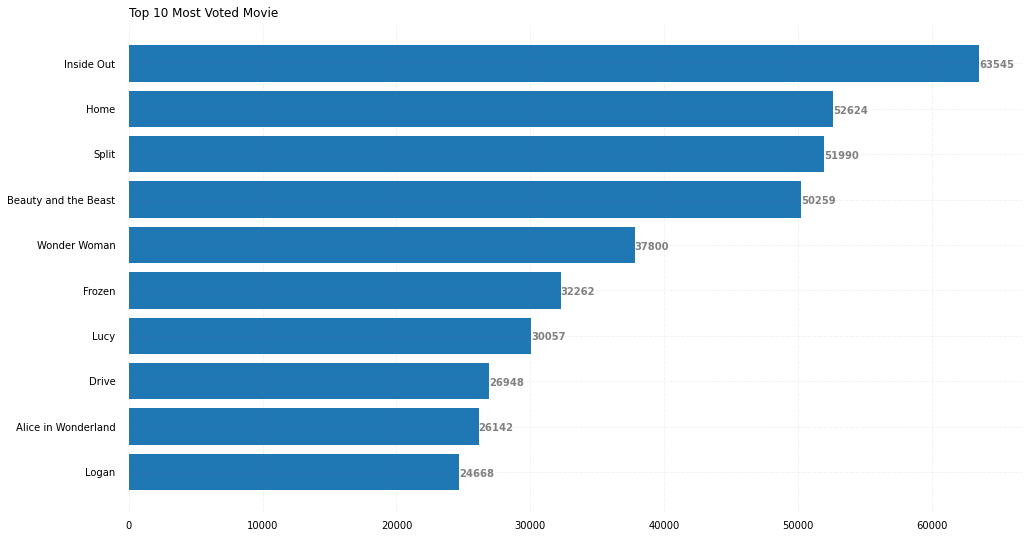

In [ ]:
name = Top_10_Most_Voted_Movies['primary_title']
price =Top_10_Most_Voted_Movies['vote_count']
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Top 10 Most Voted Movie',
             loc ='left', )
 

 
# Show Plot
plt.show()

In [ ]:
language_Top_Popular_Movies = Concat_dataset.groupby(['original_language'])['popularity'].sum().sort_values(ascending=False).reset_index()

In [ ]:
Top_Most_10_Movies_In_Language=language_Top_Popular_Movies.head(10)

<ipython-input-162-a8377948ee0e>:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


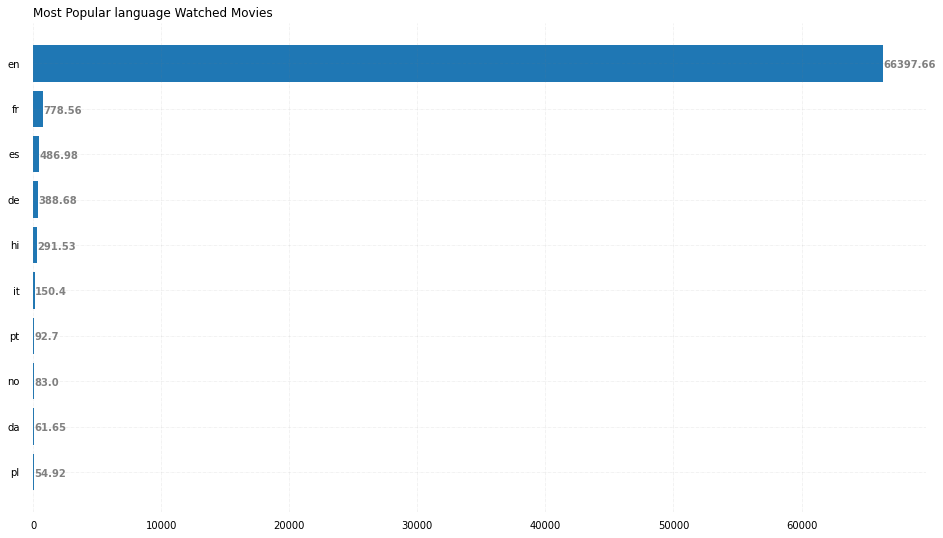

In [ ]:
name = Top_Most_10_Movies_In_Language['original_language']
price=Top_Most_10_Movies_In_Language['popularity']
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Most Popular language Watched Movies',
             loc ='left', )
 

 
# Show Plot
plt.show()

In [ ]:
Most_Voted_Movies = Concat_dataset.groupby(['original_language'])['vote_count'].sum().sort_values(ascending=False).reset_index()


In [ ]:
Top_10_Most_Voted_Movies_In_Langauge=Most_Voted_Movies.head(10)

<ipython-input-166-6b2baf66fe1a>:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


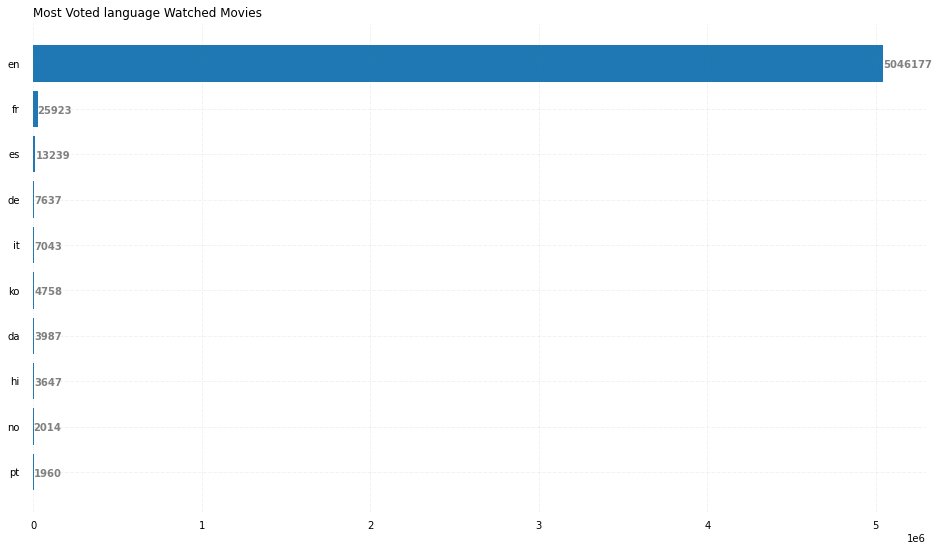

In [ ]:
name = Top_10_Most_Voted_Movies_In_Langauge['original_language']
price=Top_10_Most_Voted_Movies_In_Langauge['vote_count']
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Most Voted language Watched Movies',
             loc ='left', )
 

 
# Show Plot
plt.show()

## Recommendation

#### Recommendation System :This Recommendation System will take the name of the movie and give us the genre 

In [ ]:
C=Concat_dataset['vote_average'].mean()

In [ ]:
m= Concat_dataset['vote_count'].quantile(0.9)

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
Concat_dataset['score'] = Concat_dataset.apply(weighted_rating, axis=1)

In [ ]:
Concat_dataset=Concat_dataset.sort_values('score',ascending=False)

- **Please Enter The title of the Movie its Gives you Genre of the Movie**

In [ ]:
Name_of_the_movie=input('Please Enter The Primary title to Get the Genre')
try :
  Recommend_nearest_movies=list(Concat_dataset.loc[Concat_dataset.primary_title==Name_of_the_movie]['score'].head(1))[0]
except :
  print('Please Enter the Correct Title of the Movie try again run the cell again')

Please Enter The Primary title to Get the GenreInception


### Movie Genre Score

In [ ]:
Concat_dataset.loc[Concat_dataset.score<=Recommend_nearest_movies].sort_values('score',ascending=False).head(3)[['genres']]

,genres
3,"Action,Adventure,Sci-Fi"
16875,"Action,Adventure,Sci-Fi"
8437,"Adventure,Drama,Sci-Fi"


##Report Writing 


In this report, I will discuss the requirements and findings of a recommendation system that I developed for a dataset of movies. The dataset contains various attributes such as movie title, genre, popularity score, and most voted movie. The primary purpose of the recommendation system is to determine the genre of a movie based on its title i used Imdb Formula to find the score between Movies and on that basis i am finding the most similar genre of movies.Apart from building the recommendation system, I also analyzed the dataset to identify the most popular and most voted movies based on their popularity scores and language. I found that the most popular movies were those with high popularity scores, while the most voted movies were those with high votes based on language.Based on the analysis, I identified the most popular movies across different languages, including English, Spanish, French, and Chinese. Similarly, I also identified the most voted movies based on their language. The analysis helped me understand the preferences of viewers based on language and popularity.